In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Chummy\AppData\Local\Programs\Python\Python39\lib\site-packages\trait

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
maxlen = 100
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [4]:
num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [6]:
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 1417518 (5.41 MB)
Trainable params: 1417518 (5.41 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train,epochs=10,
                    batch_size=64,validation_split=0.2)

Epoch 1/10
113/113 [==============================] - 29s 252ms/step - loss: 1.2976 - accuracy: 0.6484 - val_loss: 1.4633 - val_accuracy: 0.6238
Epoch 2/10
113/113 [==============================] - 28s 247ms/step - loss: 1.0790 - accuracy: 0.7084 - val_loss: 1.4198 - val_accuracy: 0.6433
Epoch 3/10
113/113 [==============================] - 28s 248ms/step - loss: 0.8956 - accuracy: 0.7596 - val_loss: 1.4348 - val_accuracy: 0.6533
Epoch 4/10
113/113 [==============================] - 27s 244ms/step - loss: 0.7418 - accuracy: 0.8049 - val_loss: 1.4577 - val_accuracy: 0.6717
Epoch 5/10
113/113 [==============================] - 28s 250ms/step - loss: 0.6307 - accuracy: 0.8327 - val_loss: 1.4398 - val_accuracy: 0.6700
Epoch 6/10
113/113 [==============================] - 28s 248ms/step - loss: 0.5026 - accuracy: 0.8690 - val_loss: 1.5007 - val_accuracy: 0.6867
Epoch 7/10
113/113 [==============================] - 27s 242ms/step - loss: 0.4226 - accuracy: 0.8906 - val_loss: 1.5306 - val_ac

In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

71/71 [==============================] - 5s 65ms/step - loss: 1.8602 - accuracy: 0.6518
Test Accuracy: 65.18%


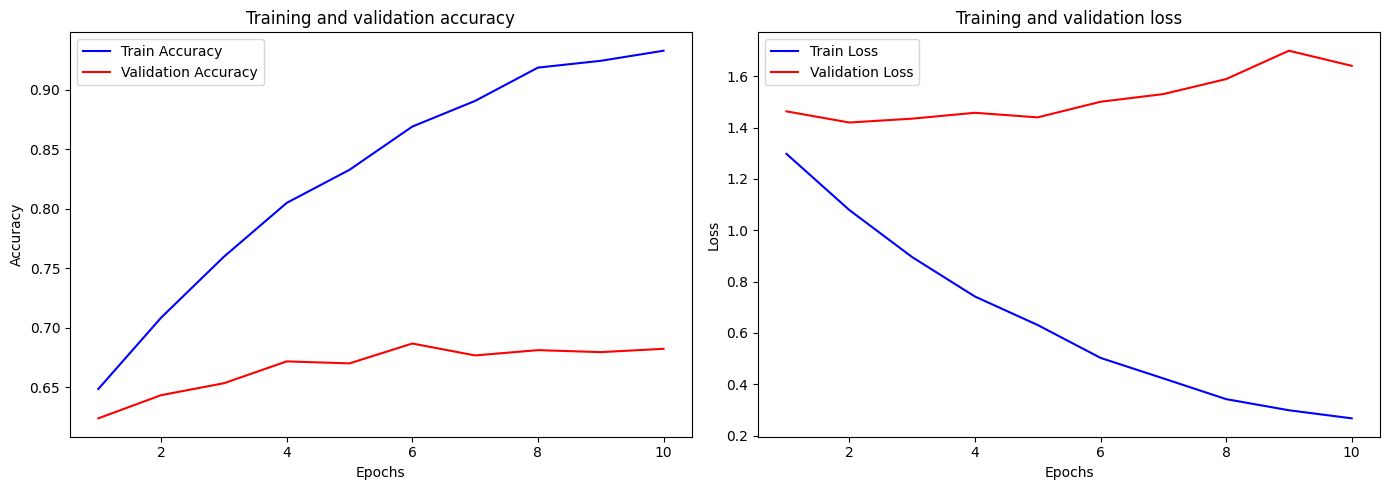

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

axes[0].plot(epochs, acc, 'b', label='Train Accuracy')
axes[0].plot(epochs, val_acc, 'r', label='Validation Accuracy')
axes[0].set_title('Training and validation accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(epochs, loss, 'b', label='Train Loss')
axes[1].plot(epochs, val_loss, 'r', label='Validation Loss')
axes[1].set_title('Training and validation loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()

plt.show()